If you're looking at this file on GitHub, make sure to follow [the instructions for getting set up](https://docs.google.com/document/d/1-LXG5Lb76xQy70W2ZdannnYMEXRLt0CsoiaK0gTkmfY/edit?usp=sharing) first. You should [download these files](https://github.com/pbloem/machine-learning/archive/master.zip) to your machine and run them locally.

## Worksheet 1: Numpy and Matplotlib

This is a _Jupyter notebook_. It consists of a series of _cells_. Some contain simple text, like this one, and some contain code, like the one below. Read each cell carefully. If it contains code, you can click the "play" button above to execute it. Don't execute a new cell until all previous ones have finished executing.

**NB: If you go back up an re-run a cell, it can happen that it doesn't work anymore, because the variable names have been re-used. If something doesn't work, for any reason, please try "Kernel > Restart & Clear Output" and start again from the top. If the error keeps happening, please post a question on the Canvas message board.**

We will assume that you know the basics of Python. If you don't, please work your way through [this tutorial](https://www.learnpython.org/) first to get caught up.

The next cell imports the library **numpy** (short for **num**eric **py**thon).

In [1]:
import numpy as np

If you see something like "In [1]:" next to the cell above, execution has finished.

## Numpy

Numpy is a _Linear Algebra_ library. It allows you to represent vectors, matrices and tensors as Python objects, and to manipulate these in all the ways you'd expect. 

Most machine learning research uses Linear Algebra as its basic language, so most machine learning _code_ is built on libraries like numpy.

Let's start by making a 2 x 2 matrix, filled with some arbitrary numbers.

In [2]:
np.asarray([[2, 3],[4, 5]])

array([[2, 3],
       [4, 5]])

The numpy [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.asarray.html) can tell you more about all of the functions you see here. Each function is annotated with several examples.

We can also create a matrix of random numbers between 0.0 and 1.0:

In [3]:
np.random.rand(2,2)

array([[0.84574357, 0.60679913],
       [0.69035128, 0.63381439]])

Note that the numbers change if you execute the cell again. The arguments indicate the _shape_ of the resulting matrix. Try changing the cell above; if you pass rand a single argument, you get a vector. If you pass it more than two arguments, you get a _tensor_ (the higher-dimensional analogue of a matrix).

Let's take a slightly bigger matrix, and see what we can do with it. This time, we'll load some actual data:

In [4]:
data = np.loadtxt('./BTC-USD.csv', delimiter=',', skiprows=1, dtype='str')
print(data)

[['2014-09-17' '465.864014' '468.174011' ... '457.334015' '457.334015'
  '21056800']
 ['2014-09-18' '456.859985' '456.859985' ... '424.440002' '424.440002'
  '34483200']
 ['2014-09-19' '424.102997' '427.834991' ... '394.795990' '394.795990'
  '37919700']
 ...
 ['2022-05-03' '38528.109375' '38629.996094' ... '37750.453125'
  '37750.453125' '27326943244']
 ['2022-05-04' '37748.011719' '39902.949219' ... '39698.371094'
  '39698.371094' '36754404490']
 ['2022-05-05' '39727.386719' '39788.441406' ... '39568.812500'
  '39568.812500' '34693083136']]


Each row in this matrix represents a professional cricketer from the 19th or 20th century. The first column indicates their year of birth, the second indicates how old they were when the data was collected if they were still alive, or at what age they died, otherwise. 

Let's start by seeing how many cricketers we have:

In [5]:
data.shape

(2788, 7)

Our data has 5960 rows, and two columns. We can ask for a specific element of the matrix by using square brackets to index the matrix. Here is the date of birth and age of the 10th cricketer:

In [6]:
# Date,Open,High,Low,Close,Adj Close,Volume
print('Date: ', data[9, 0])
print('Open: ', data[9, 1])
print('High: ', data[9, 2])
print('Low: ', data[9, 3])
print('Close: ', data[9, 4])
print('Adj Close: ', data[9, 5])
print('Volume: ', data[9, 6])

Date:  2014-09-26
Open:  411.428986
High:  414.937988
Low:  400.009003
Close:  404.424988
Adj Close:  404.424988
Volume:  21460800


**Note that indexing starts from 0.** The first column is column 0, and the second is column 1.

The [slicing syntax](https://www.oreilly.com/learning/how-do-i-use-the-slice-notation-in-python) that you know from python lists can also be used for matrices. For instance, here are the first ten cricketers' years of birth:

**Date and values of the first 10 columns of BTC**

In [7]:
data[0:10, [0,1]] 

array([['2014-09-17', '465.864014'],
       ['2014-09-18', '456.859985'],
       ['2014-09-19', '424.102997'],
       ['2014-09-20', '394.673004'],
       ['2014-09-21', '408.084991'],
       ['2014-09-22', '399.100006'],
       ['2014-09-23', '402.092010'],
       ['2014-09-24', '435.751007'],
       ['2014-09-25', '423.156006'],
       ['2014-09-26', '411.428986']], dtype='<U12')

To check that you understand, see if you can predict the result of the following slicing operations (and then execute the cells):

In [8]:
data[:, 1]

array(['465.864014', '456.859985', '424.102997', ..., '38528.109375',
       '37748.011719', '39727.386719'], dtype='<U12')

In [9]:
data[0:10, :]

array([['2014-09-17', '465.864014', '468.174011', '452.421997',
        '457.334015', '457.334015', '21056800'],
       ['2014-09-18', '456.859985', '456.859985', '413.104004',
        '424.440002', '424.440002', '34483200'],
       ['2014-09-19', '424.102997', '427.834991', '384.532013',
        '394.795990', '394.795990', '37919700'],
       ['2014-09-20', '394.673004', '423.295990', '389.882996',
        '408.903992', '408.903992', '36863600'],
       ['2014-09-21', '408.084991', '412.425995', '393.181000',
        '398.821014', '398.821014', '26580100'],
       ['2014-09-22', '399.100006', '406.915985', '397.130005',
        '402.152008', '402.152008', '24127600'],
       ['2014-09-23', '402.092010', '441.557007', '396.196991',
        '435.790985', '435.790985', '45099500'],
       ['2014-09-24', '435.751007', '436.112000', '421.131989',
        '423.204987', '423.204987', '30627700'],
       ['2014-09-25', '423.156006', '423.519989', '409.467987',
        '411.574005', '411.57400

In [10]:
data[-1, :]

array(['2022-05-05', '39727.386719', '39788.441406', '39444.644531',
       '39568.812500', '39568.812500', '34693083136'], dtype='<U12')

## Matplotlib

The first rule of data science is _look at your data_. We can do this easily with the library **matplotlib**. Let's start by importing it.

In [11]:
import matplotlib.pyplot as plt
# ensure that plots are displayed inside the notebook
%matplotlib inline 

We've imported the pyplot sublibrary. This library acts as a "state machine", it assumes we are working on a single plot and every command we give changes the state of that plot. This is great for simple plots.

For more complicated stuff, you may want to use [the object-oriented interface](https://matplotlib.org/faq/usage_faq.html). This is a little more complicated, but more powerful.

For now, we can keep things simple. We want a scatter plot of the first column in the data (year of birth) against the second (age). We can to this with the plt.scatter() command. It expects at least two arguments: vectors of the same length, indicating the x and y coordinate of each point. In other words, we'll need to slice our data matrix into the first and second columns:

In [12]:
date = data[:, 0]
opening = data[:, 1]
high = data[:, 2]
low = data[:, 3]
closing = data[:, 4]
adjclosing = data[:, 5]
volume = data[:, 6]
date = np.asarray(date, dtype='datetime64[s]')
opening = [float(x) for x in opening]
high = [float(x) for x in high]
low = [float(x) for x in low]
closing = [float(x) for x in closing]
adjclosing = [float(x) for x in adjclosing]
volume = [float(x) for x in volume]
# plt.scatter(x, y);             # the semicolon stops jupyter from printing the result of the last function call

Let's make the dots a little smaller, and slightly transparent, to show the structure a little better. See [the documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) for more options.

Let's also be good data scientists and label our axes.

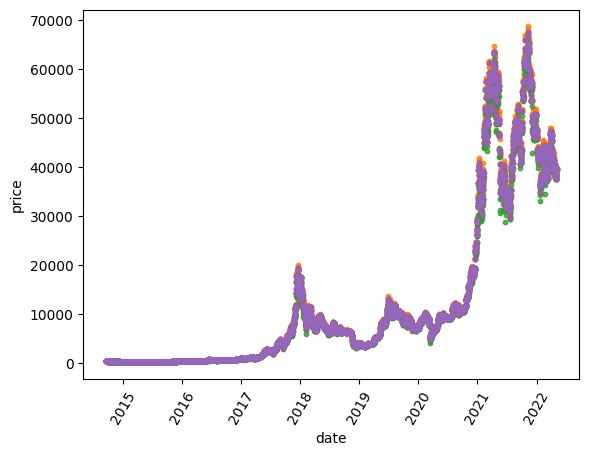

In [13]:
plt.xticks(rotation=60)
plt.scatter(date, opening, s=10, alpha=0.8)
plt.scatter(date, high, s=10, alpha=0.8)
plt.scatter(date, low, s=10, alpha=0.8)
plt.scatter(date, closing, s=10, alpha=0.8)
plt.scatter(date, adjclosing, s=10, alpha=0.8)
# plt.scatter(x, volume, s=10, alpha=0.8)
plt.xlabel('date')
plt.ylabel('price');

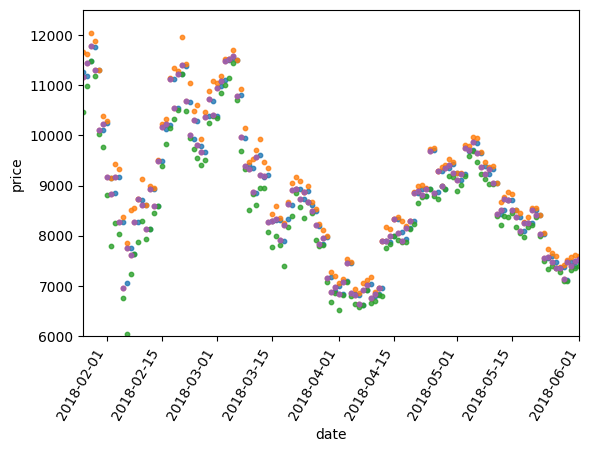

In [14]:
import datetime
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.set_xlim([datetime.date(2018, 1, 26), datetime.date(2018, 6, 1)])
ax.set_ylim([6000, 12500])
plt.xticks(rotation=60)
plt.scatter(date, opening, s=10, alpha=0.8)
plt.scatter(date, high, s=10, alpha=0.8)
plt.scatter(date, low, s=10, alpha=0.8)
plt.scatter(date, closing, s=10, alpha=0.8)
plt.scatter(date, adjclosing, s=10, alpha=0.8)
# plt.scatter(x, volume, s=10, alpha=0.8)
plt.xlabel('date')
plt.ylabel('price');

The most prominent feature is the dense, diagonal line at the left. Can you explain why this is there?

In the middle of the plot, we see two, more noisy, more vague diagonal lines. Can you guess what they represent?

To clear this up, we can make a different plot: we can plot the year that the cricketer _died_ against their age. This value isn't given in the data, but it's easy to compute: we just sum their age with their year of birth. Numpy makes this expecially easy by overloading the basic operators like +, -, \* and /. These are all **element-wise** operators: if we sum two matrices of the same shape, the result will be a matrix (of that shape also), in which each element is the sum of the corresponding elements in the input matrices. 

In other words, to get the year of death, we can simply do:

In [15]:
dictlist = []
for x in data:
    year = x[0].split('-')[0]
    check = 0
    for y in dictlist:
        if y["year"] == year:
            check = 1
            newhigh = y["high"] + float(x[2])
            newlow = y["low"] + float(x[3])
            newopening = y["opening"] + float(x[1])
            newclosing = y["closing"] + float(x[4])
            y.update({"high": newhigh,"low": newlow, "opening": newopening, "closing": newclosing, "amount": y["amount"] + 1})
    if check == 0:
        dictlist.append(
                {
                "year": year,
                "opening": 0,
                "high": 0,
                "low": 0,
                "closing": 0,
                "amount":1,
                }
            )
            # print("new dict created for year" + year)
            # print(dictlist)

matrix = [] 
for i in dictlist:
    array = []
    array.append(i["year"])
    array.append(i["high"]/i["amount"])
    array.append(i["low"]/i["amount"])
    array.append(i["opening"]/i["amount"])
    array.append(i["closing"]/i["amount"])
    array.append(i["amount"])
    matrix.append(array)
matrix = np.array(matrix, dtype=float)
print(matrix)
price_avg_openclose_per_year = matrix[:,3] - matrix[:,4]
numbers = np.loadtxt("BTC-USD.csv", delimiter=',', skiprows=1, usecols=range(1,5), dtype=float)
price_avg_openclose_per_day = numbers[:,0] - numbers[:,3]
price_instances = matrix[:,5]

[[ 2014.           368.84866074   351.63559395   360.66327339
    359.37861287   106.        ]
 [ 2015.           277.27407408   265.9476086    271.27110713
    271.59242446   365.        ]
 [ 2016.           573.11034406   559.28529984   565.96459587
    567.3057019    366.        ]
 [ 2017.          4141.93928024  3809.08121924  3968.00468918
   4003.29849168   365.        ]
 [ 2018.          7749.31540696  7314.707664    7562.35511759
   7534.8819597    365.        ]
 [ 2019.          7539.35696038  7212.44606969  7374.95348824
   7384.71608986   365.        ]
 [ 2020.         11284.53845954 10824.9914898  11037.12902636
  11096.70548505   366.        ]
 [ 2021.         48681.90131647 45773.08914823 47322.68001938
  47356.45489094   365.        ]
 [ 2022.         41715.86868762 39987.39856262 40913.93290643
  40850.13253138   125.        ]]


Let's check the distribution first, by plotting a histogram:

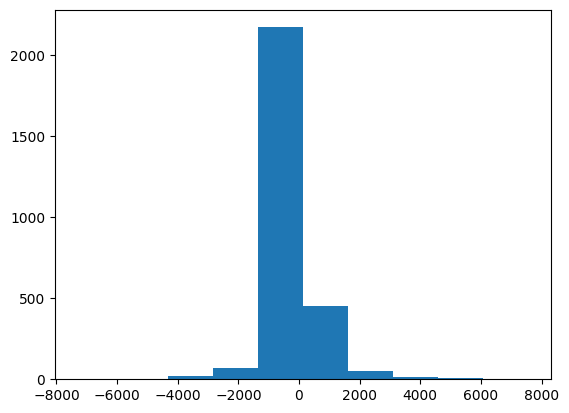

In [16]:
plt.hist(price_avg_openclose_per_day);

The big bar on the right is not some huge calamity in the cricket world. I just shows the large proportion of cricketers that were still alive when the data was gathered. Let's zoom in a little, and use some more bins to show the finer detail. Again, [the documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) shows you more options.

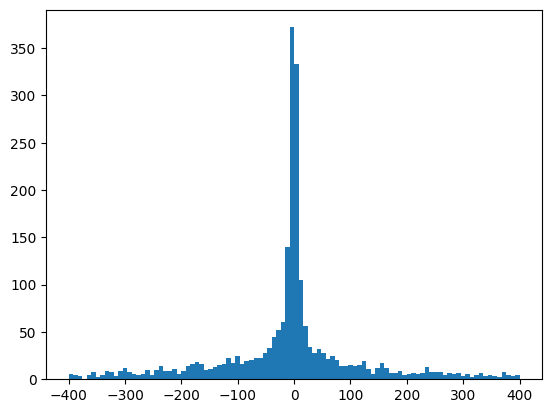

In [17]:
plt.hist(price_avg_openclose_per_day, bins=100, range=[-400, 400]);

We see a pretty big spike for World War I, but World War II is hidden in the noise. If we return to the scatter plot, se can make it stand out a little more.

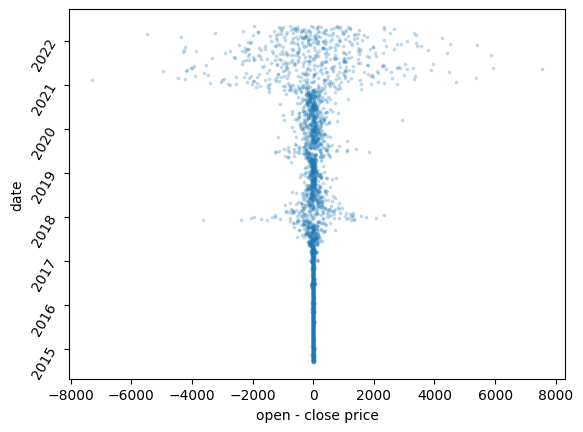

In [18]:
plt.scatter(price_avg_openclose_per_day, date, s=3, alpha=0.2)
plt.yticks(rotation=60)
plt.ylabel('date')
plt.xlabel('open - close price');

If you want to save your plot to a file, you can use ``plt.savefig('myplot.pdf')``. The filetype is automatically detected from the extension.

## Quick numpy tricks

You should now have a basic idea of how numpy works, and how to make simple plots. 
Numpy is a complex library with many options. We'll finish up by showing you a few important aspects, and pointing you  to some more elaborate tutorials.

### Matrix multplication

First up: matrix multiplication. For two matrices ``a`` and ``b``, ``a * b`` gives you an element-wise multiplication. What if you want to do a full matrix multiplication? That works like this:

In [19]:
a = np.asarray([[1, 2],[3, 4]])
print(a)
b = np.eye(2) # the 2x2 identity matrix

print('\nelement-wise\n', a * b)

print('\nmatrix multiplication\n', a.dot(b))

[[1 2]
 [3 4]]

element-wise
 [[1. 0.]
 [0. 4.]]

matrix multiplication
 [[1. 2.]
 [3. 4.]]


### Broadcasting

[Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) is one of numpy's most complex, and most useful behaviors. Put simply, when you try apply an element-wise operation (like +) to two matrices that don't have the same size, numpy checks if it can stretch one of them to make the sizes match. 

The simplest example is combining a matrix with a scalar. Let's say we want to add 10 to every element in a matrix. 


In [20]:
a + 10

array([[11, 12],
       [13, 14]])

Under the hood, numpy dynamically stretches the scalar 10 out to a matrix of 2x2, filled with 10's and then adds that, element-wise, to ``a``.

Here is another example, adding a length 3 vector to a 16x3 matrix:

In [21]:
a = np.random.rand(16,3)
b = np.asarray([0,1,2])
a + b

array([[0.79047439, 1.27013316, 2.50739596],
       [0.25383607, 1.48308342, 2.31572958],
       [0.4467633 , 1.77158866, 2.58734507],
       [0.30755221, 1.09408129, 2.57680665],
       [0.00322423, 1.10740285, 2.55456731],
       [0.57343929, 1.52090096, 2.4201623 ],
       [0.0733081 , 1.13650307, 2.87518956],
       [0.57843194, 1.54787666, 2.19131974],
       [0.6762999 , 1.40744146, 2.45922638],
       [0.86020737, 1.24045634, 2.99029572],
       [0.85041951, 1.95204068, 2.68298962],
       [0.94967058, 1.8212249 , 2.80349307],
       [0.72781126, 1.33364839, 2.99156481],
       [0.09954242, 1.73655699, 2.64206548],
       [0.62669927, 1.02978271, 2.44157888],
       [0.69691835, 1.5290414 , 2.88792205]])

If the two matrices being added don't have the same number of dimensions, they are aligned from the last dimension. In this case, broadcasting was allowed, because the last dimension of ``a`` matched the last dimension of ``b``. If ``b`` had been 16 elements long, we would not be allowed to broadcast (try it).

In this case, we could add a dimension, to make ``b`` a 16x1 matrix. The broadcasting rules allow any dimension of size 1 to be stretched to match the other matrix.

I'm sure that right now, broadcasting seems quite mysterious. It's enough to be aware that this behavior exists. If you encounter it in action, you'll see how much easier and intuitive it can make things. The numpy documentation provides [a more complete explanation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) if you need one.

## Final comments

That's it for this worksheet. This doesn't make your numpy/matplotlib experts, but it hopefully gives you an indication of how things work, and a safe environment to experiment in. Just click the plus-icon in the toolbar make a new cell, and start playing around with the data.

To learn more about **numpy**, you can start here:
* [The official numpy quickstart guide](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* [A more in-depth tutorial, with in-browser samples](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)
* [A very good walk through the most important functions and features](http://cs231n.github.io/python-numpy-tutorial/). From the famous [CS231n course](http://cs231n.github.io/), from Stanford.

To dive deeper into **matplotlib**, these are some good jumping-off points:
* [The official pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html). Note that pyplot can accept basic python lists as well as numpy data.
* [A gallery of example MPL plots](https://matplotlib.org/gallery.html). Most of these do not use the pyplot state-machine interface, but the more low level objects like [Axes](https://matplotlib.org/api/axes_api.html).
* [In-depth walk through the main features and plot types](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

In the next worksheet, we'll see how to take some numpy data, and apply a machine learning algorithm to it, using the **sklearn** library.